### Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
current_palette = sns.color_palette()
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from IPython.display import clear_output
sns.set_style('darkgrid')
np.random.seed(0)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import sklearn.metrics as mt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from plot_confusion_matrix import plot_confusion_matrix
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,34))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
import obtain as ob

### Obtain

In [2]:
poverty_df = ob.upload_county_acs_data('ACSDP5Y2012.DP03_data_with_overlays_2019-12-31T163946.csv')
df = poverty_df
population_df = ob.upload_county_acs_data('ACSDP5Y2012.DP05_data_with_overlays_2019-12-31T193014.csv')
df = ob.merge_acs_data(df,population_df)
df = ob.remove_duplicate_countystate(df) 
num_df, object_df = ob.separate_num_columns(df)
pull_columns = [i for i in num_df.columns]
cms_df = ob.cms_data()
df = cms_df.merge(df.drop(columns =['County','State']), how='left', on=['CountyState'])
model_df = df
target = 'ratio_to_max_payment'
step = 10
bins = [i/100 for i in range(0,100+step,step)]
bins[-1] +=.01
cms_labels =ob.cms_procedure_dummy_labels(df).columns
num_df, object_df = ob.separate_num_columns(model_df)
num_df, a = ob.remove_cms(num_df)

In [3]:
def random_forest(data, target_column='ratio_to_max_payment', show=20, n_estimators=100, max_depth = 5):
    y= data[target_column]
    X = data.drop(columns=[target_column])
    data_train, data_test, target_train, target_test = train_test_split(X, y, 
                                                                        test_size = 0.25)


    forest = RandomForestClassifier(n_estimators=n_estimators, criterion='entropy', max_depth=max_depth)
    forest.fit(data_train,target_train)
    df_feature_importance = pd.Series(data = forest.feature_importances_, index= X.columns).sort_values(ascending=False)
    print(df_feature_importance[:show])
    print(forest.score(data_train,target_train), forest.score(data_test,target_test))
    return forest, df_feature_importance


In [4]:
dsd = pd.cut(df[target],bins, right=False).unique()
dsd = dsd.sort_values().astype(str)
num_df[target] = pd.cut(df[target],bins, right=False).astype(str)
#num_df[target] = num_df[target].apply(lambda x:'(0.9, 1.0]' if x == 'nan')


In [5]:
model_clean, feat = random_forest(num_df)
X = num_df.drop(columns=[target])
pred = model_clean.predict(X)
cnf_matrix = confusion_matrix(num_df[target], pred)

Percent_COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)                                         0.051632
BRONCHITIS_&_ASTHMA                                                                                         0.042062
Percent_COMMUTING_TO_WORK_Car,_truck,_or_van_--_drove_alone                                                 0.039968
PULMONARY_EDEMA_&_RESPIRATORY_FAILURE                                                                       0.031252
Percent_RACE_One_race_Asian                                                                                 0.030365
COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)                                                 0.024969
with_mcc                                                                                                    0.024080
Percent_RACE_One_race_Asian_Chinese                                                                         0.023739
HISPANIC_OR_LATINO_AND_RACE_Not_Hispanic_or_Latino_Two_or_more_r

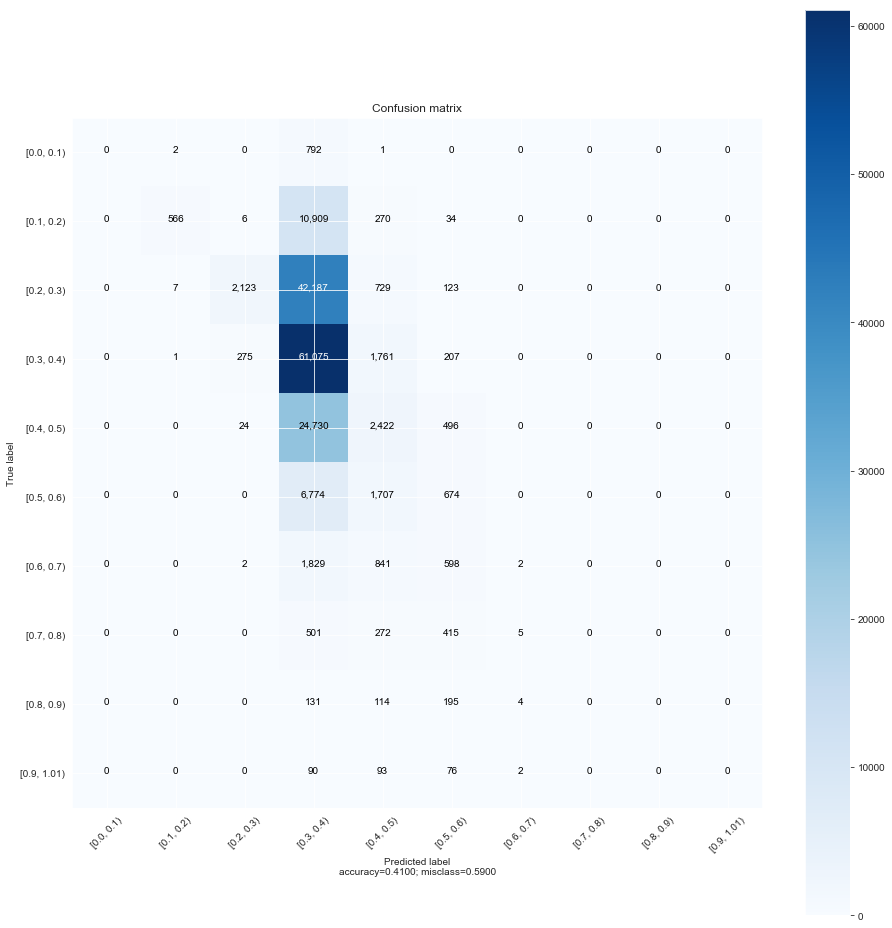

In [6]:

ax = plot_confusion_matrix(cnf_matrix, dsd, normalize=False)


with_mcc    0.087101
dtype: float64
0.6628667073805161 0.6632116441609555
False    117896
True      45169
Name: ratio_to_max_payment, dtype: int64


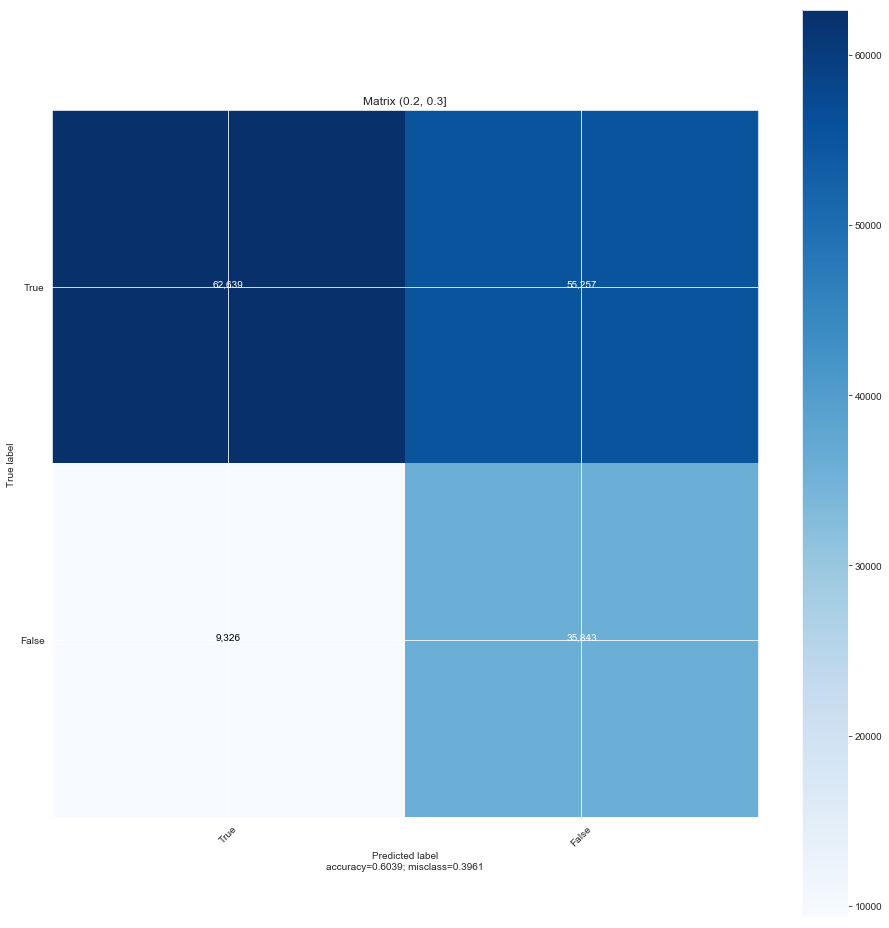

BRONCHITIS_&_ASTHMA    0.049588
dtype: float64
0.6200749904758086 0.6211376897319191
False    99746
True     63319
Name: ratio_to_max_payment, dtype: int64


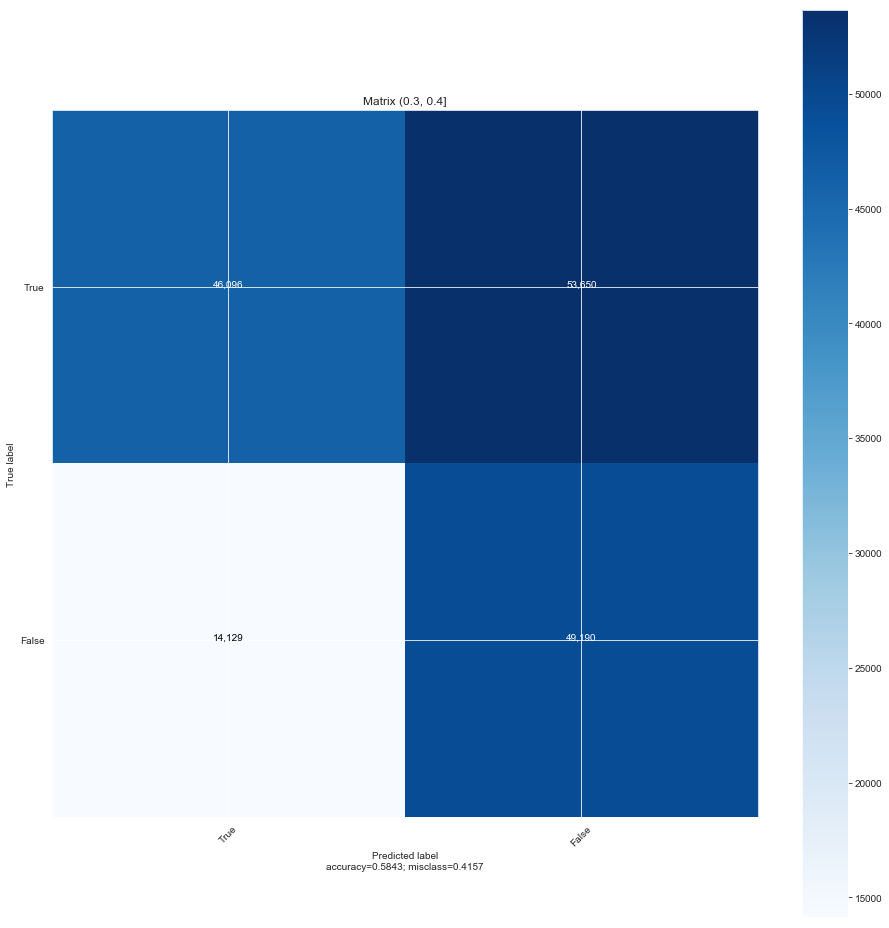

Percent_COMMUTING_TO_WORK_Car,_truck,_or_van_--_drove_alone    0.052619
dtype: float64
0.6452688230283274 0.6437065157983367
False    135393
True      27672
Name: ratio_to_max_payment, dtype: int64


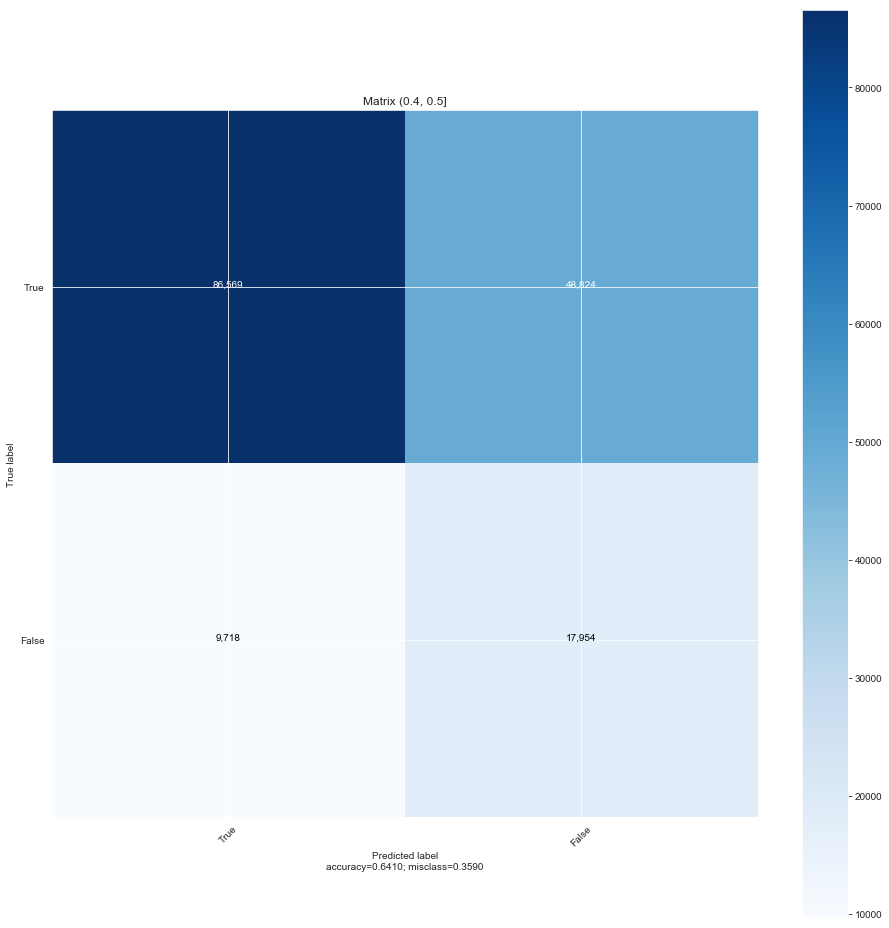

with_cc    0.124673
dtype: float64
0.8787414066631412 0.8800502379693284
False    151280
True      11785
Name: ratio_to_max_payment, dtype: int64


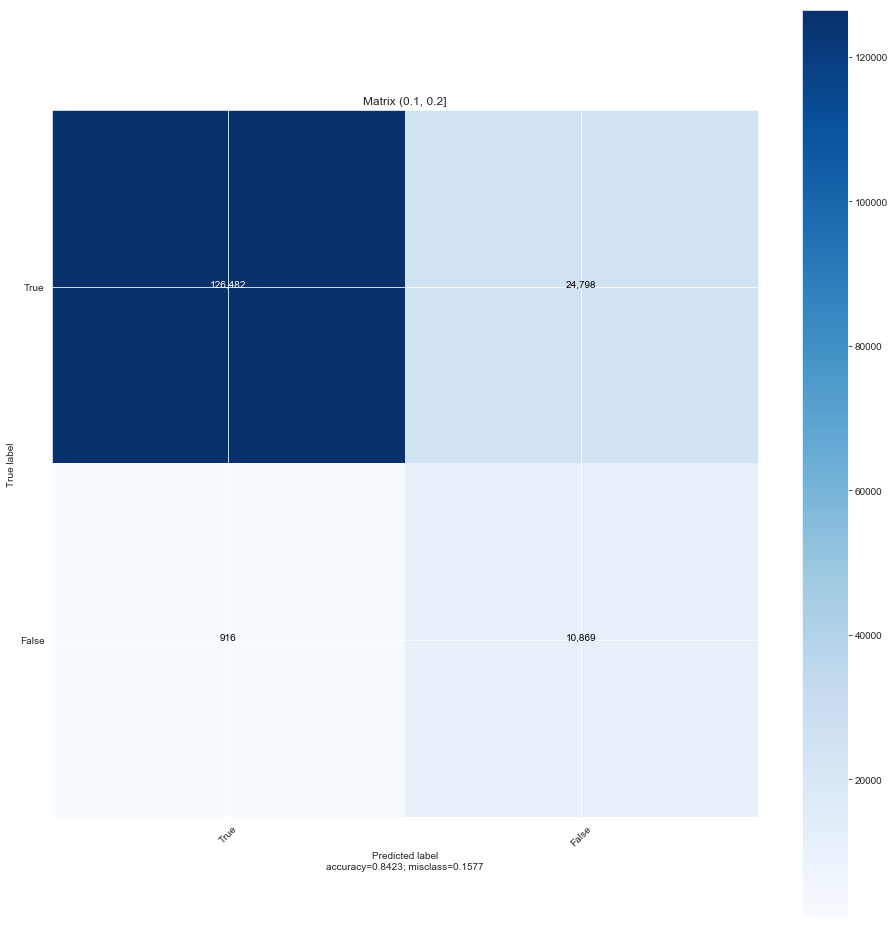

BRONCHITIS_&_ASTHMA    0.211913
dtype: float64
0.9400546414412194 0.9403956369014606
False    162270
True        795
Name: ratio_to_max_payment, dtype: int64


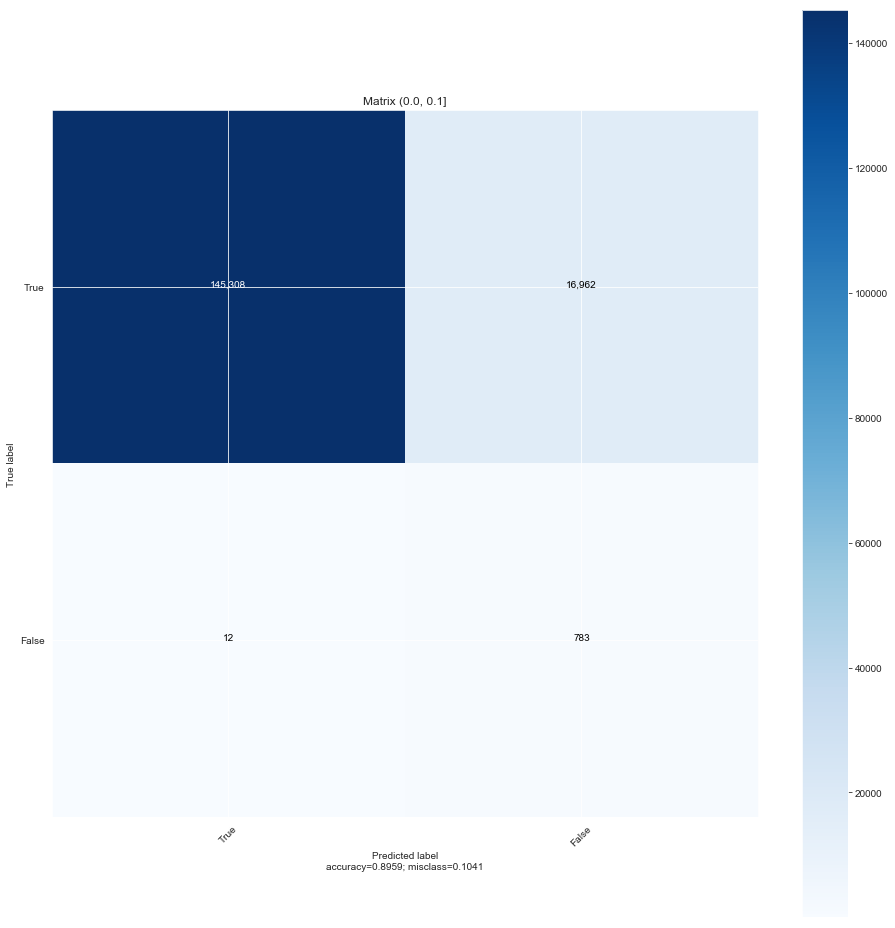

Percent_COMMUTING_TO_WORK_Car,_truck,_or_van_--_drove_alone    0.053563
dtype: float64
0.7392762003768436 0.7388733675524657
False    153910
True       9155
Name: ratio_to_max_payment, dtype: int64


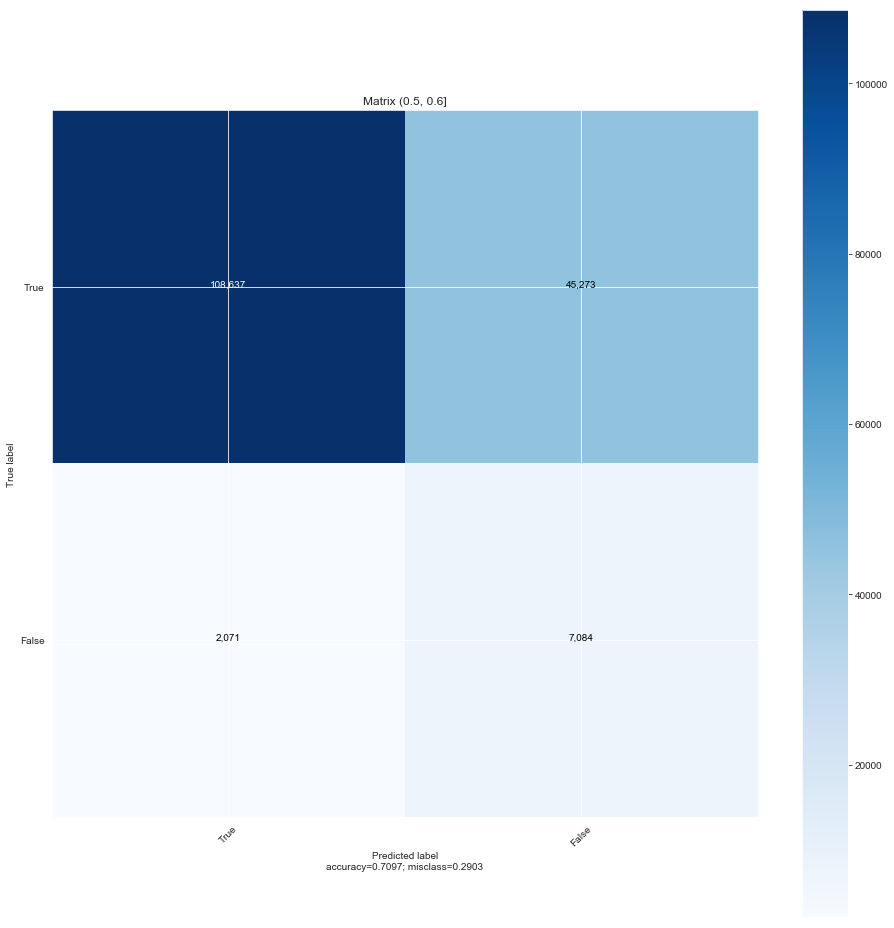

Percent_COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)    0.044602
dtype: float64
0.8175010117276972 0.8183035658410203
False    159793
True       3272
Name: ratio_to_max_payment, dtype: int64


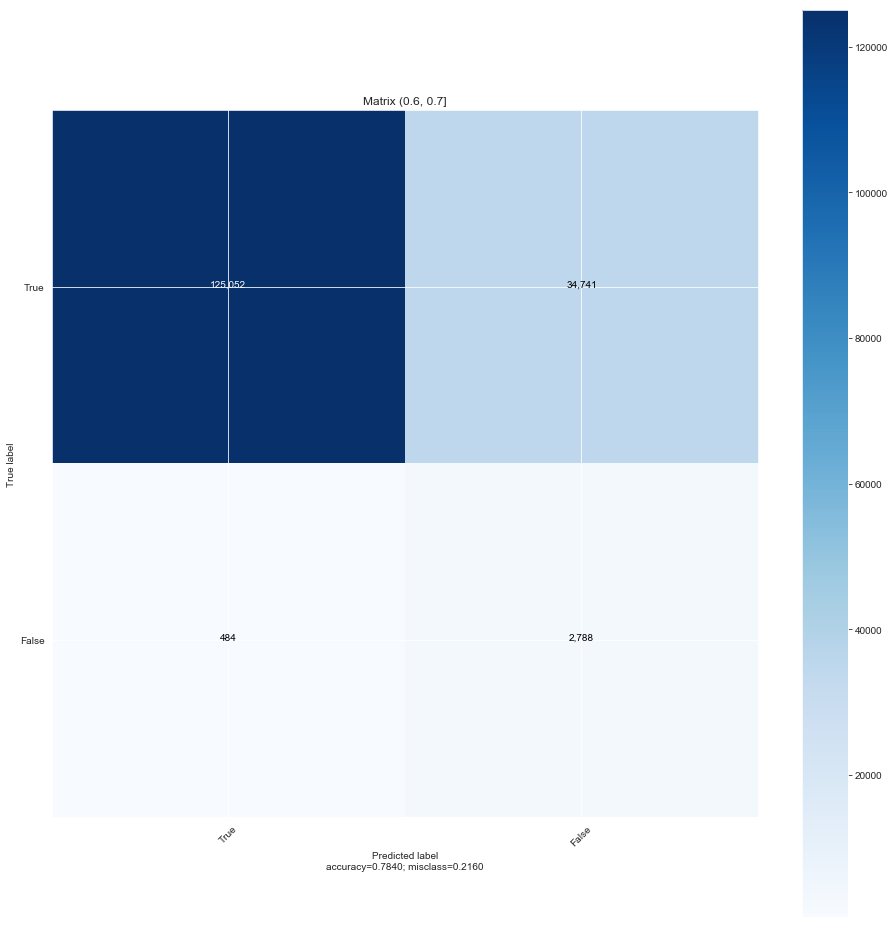

Percent_RACE_Asian    0.035995
dtype: float64
0.8862886251771046 0.8871526498120439
False    162804
True        261
Name: ratio_to_max_payment, dtype: int64


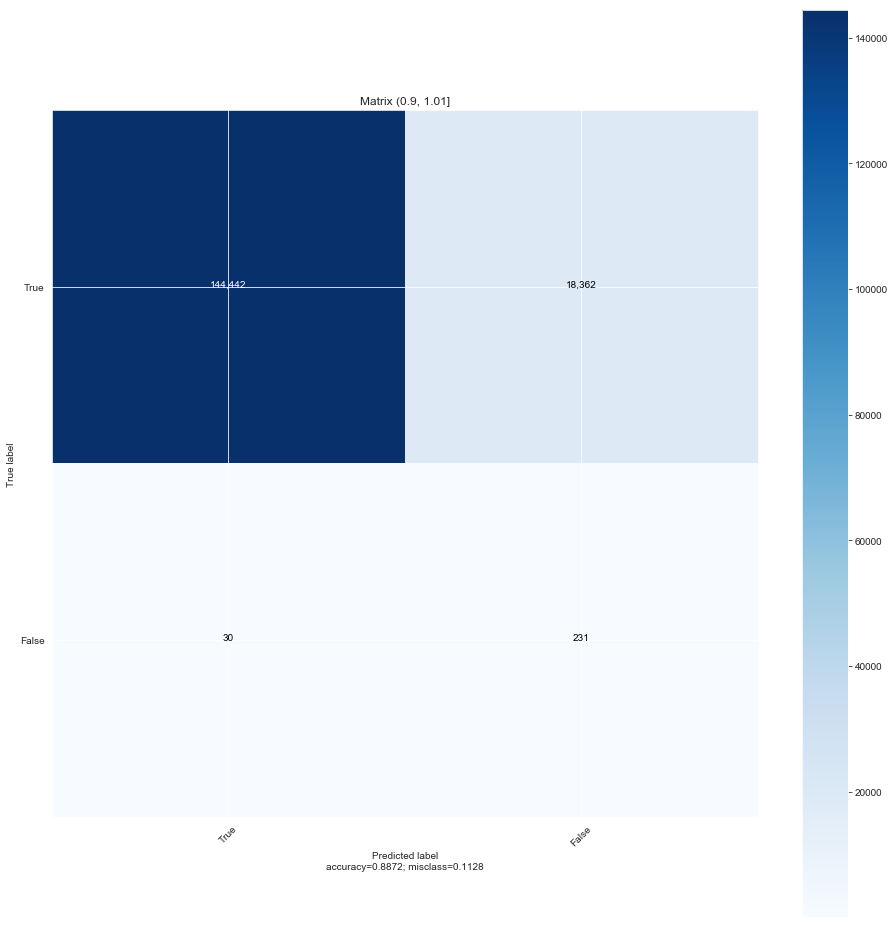

HISPANIC_OR_LATINO_AND_RACE_Hispanic_or_Latino_(of_any_race)_Other_Hispanic_or_Latino    0.043161
dtype: float64
0.8708774010740997 0.8698972027280815
False    161872
True       1193
Name: ratio_to_max_payment, dtype: int64


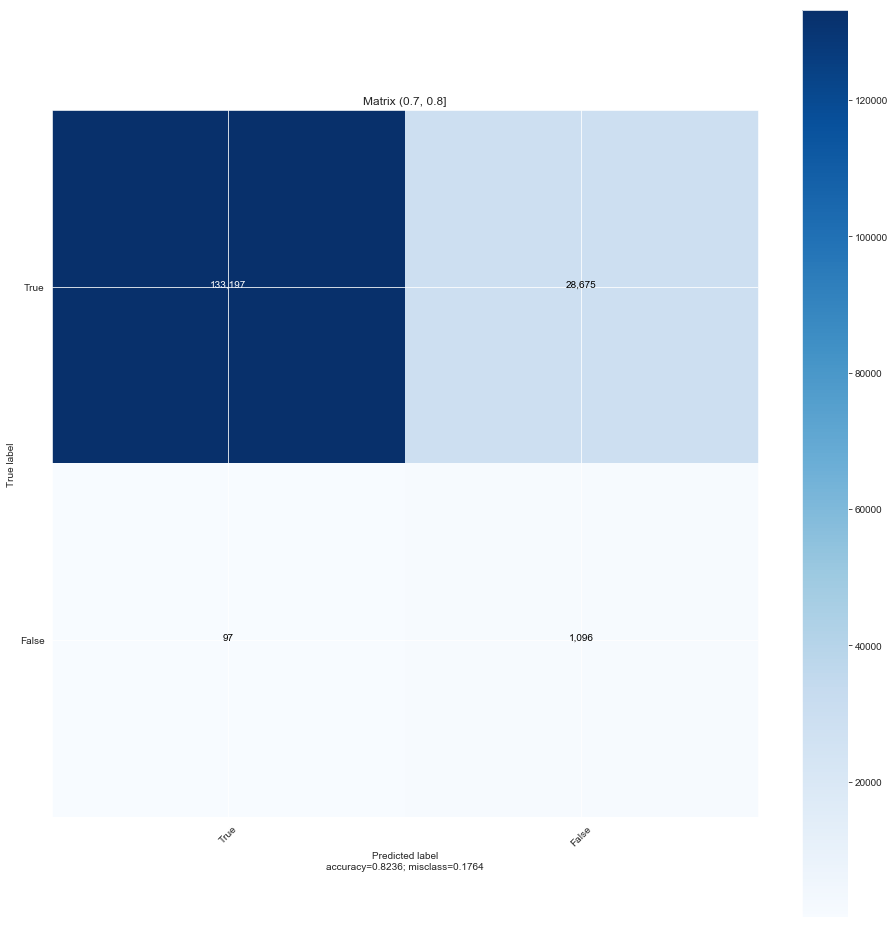

COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)    0.033635
dtype: float64
0.8992870934813534 0.8984885193885206
False    162621
True        444
Name: ratio_to_max_payment, dtype: int64


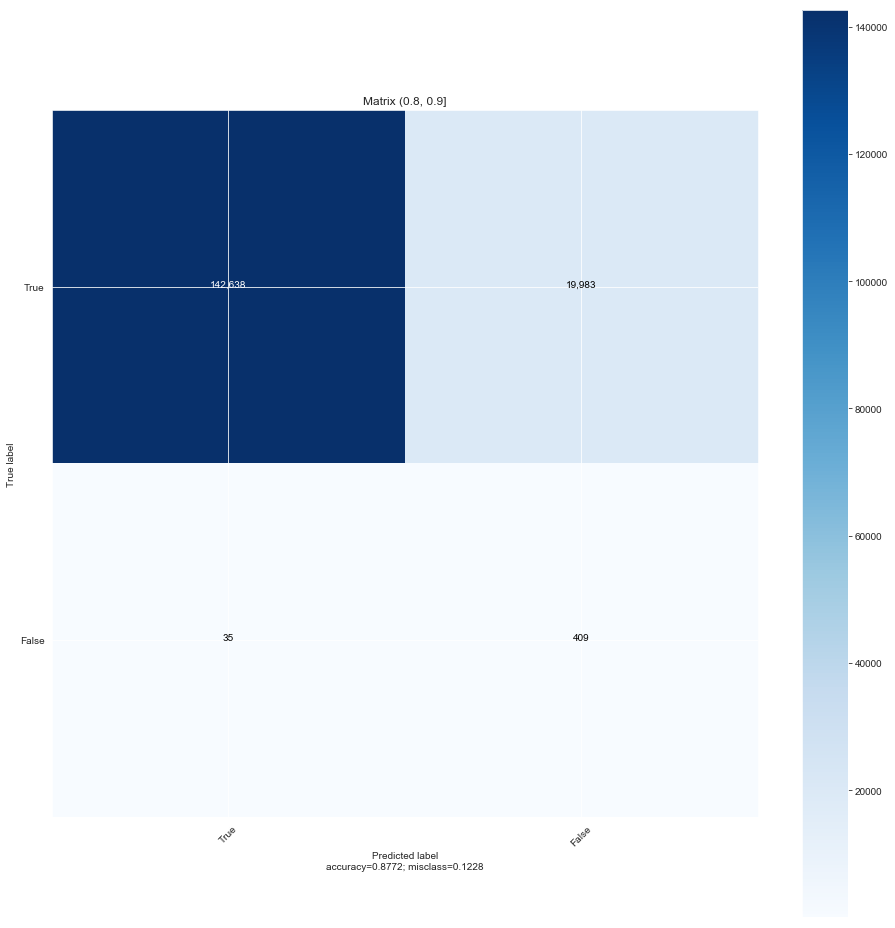

In [7]:
label = pd.cut(df[target],bins).astype(str)
predicted = []
true_false= [True, False]
for i in label.unique():
    num_df[target] = label == i
    
    values = num_df[target].value_counts().sort_values(ascending=False)
    low_class, add_sample = values.index[1], values.iloc[0]-values.iloc[-1] 
    balancing_indexes = np.random.choice(num_df[target].loc[num_df[target] == low_class].index, add_sample)
    data = num_df.append(num_df.loc[balancing_indexes], ignore_index=True)
    
    model_clean, feat = random_forest(data, show=1)
    X = num_df.drop(columns=[target])
    
    pred = model_clean.predict(X)
    print(num_df[target].value_counts())
    cnf_matrix = confusion_matrix(num_df[target], pred)
    ax = plot_confusion_matrix(cnf_matrix, true_false, title=f'Matrix {i}', normalize=False)
    plt.show()
    

BRONCHITIS_&_ASTHMA    0.210019
dtype: float64
0.9197551406092727 0.9204042644974425


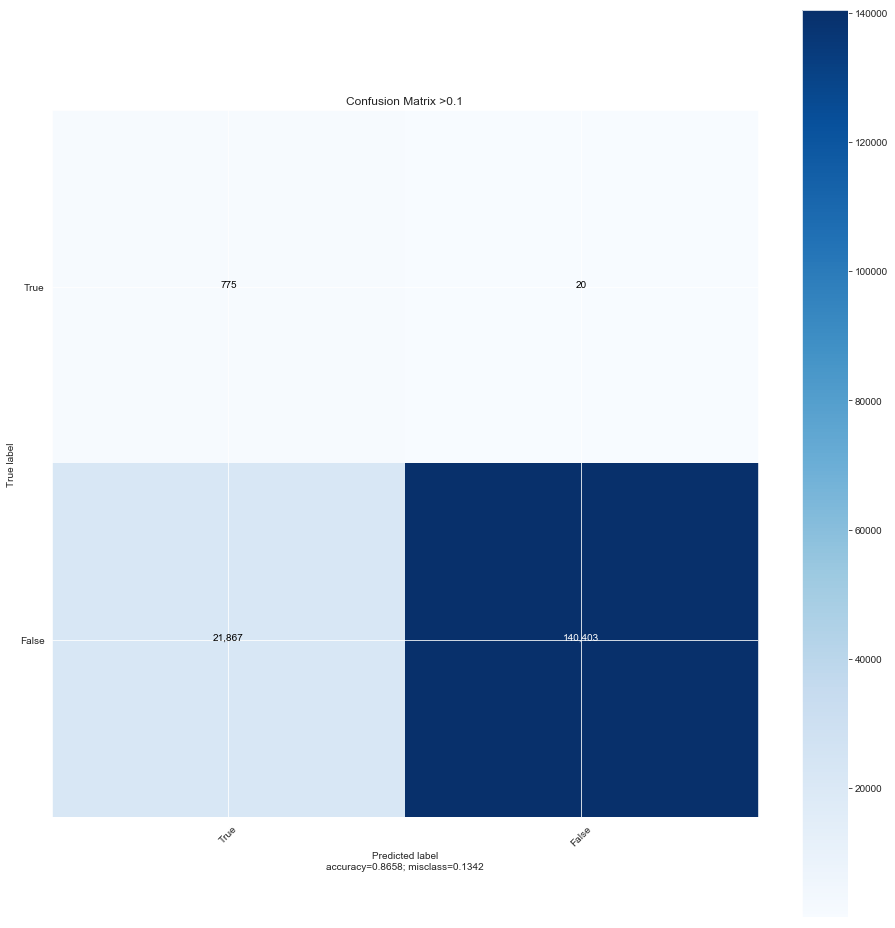

with_cc    0.116763
dtype: float64
0.8681991963743815 0.8669909493241896


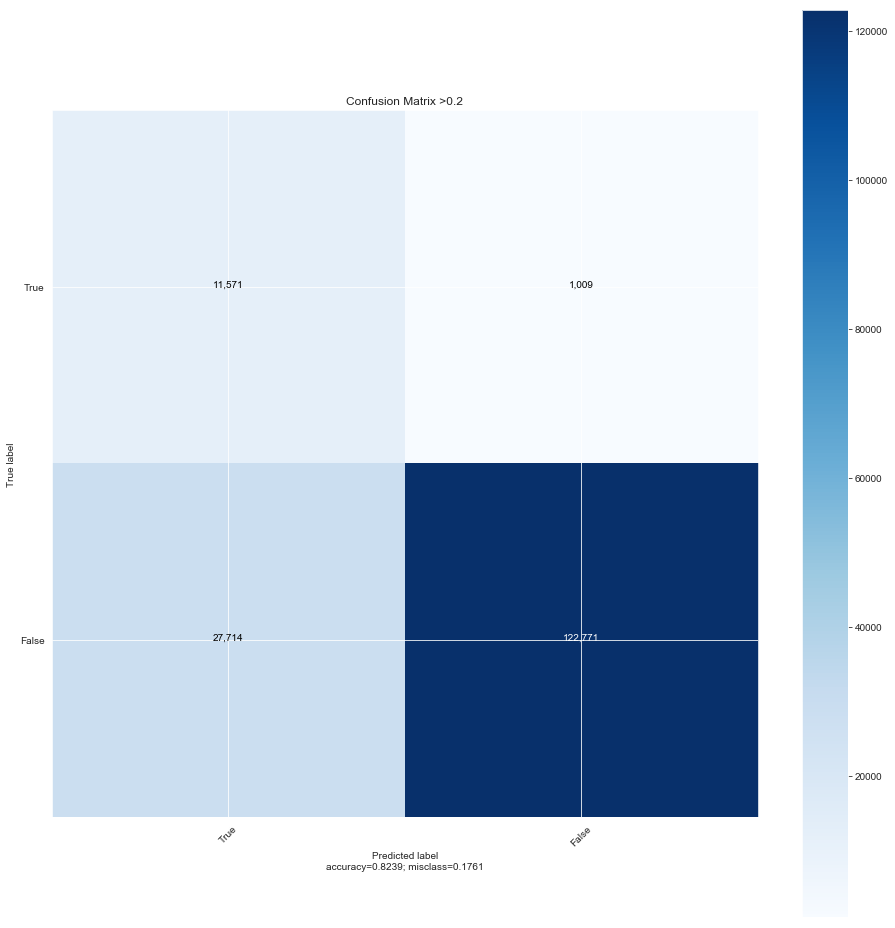

BRONCHITIS_&_ASTHMA    0.045228
dtype: float64
0.6717434514540367 0.6691101067264233


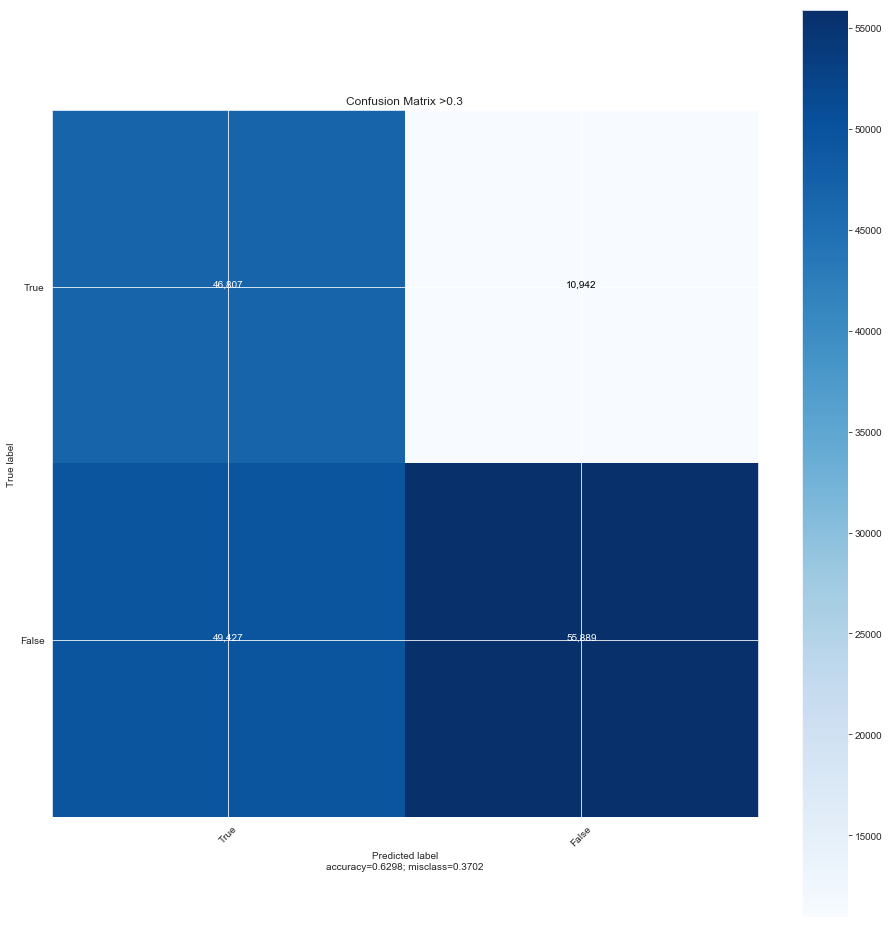

Percent_COMMUTING_TO_WORK_Car,_truck,_or_van_--_drove_alone    0.043978
dtype: float64
0.7024427043755025 0.7027125251924539


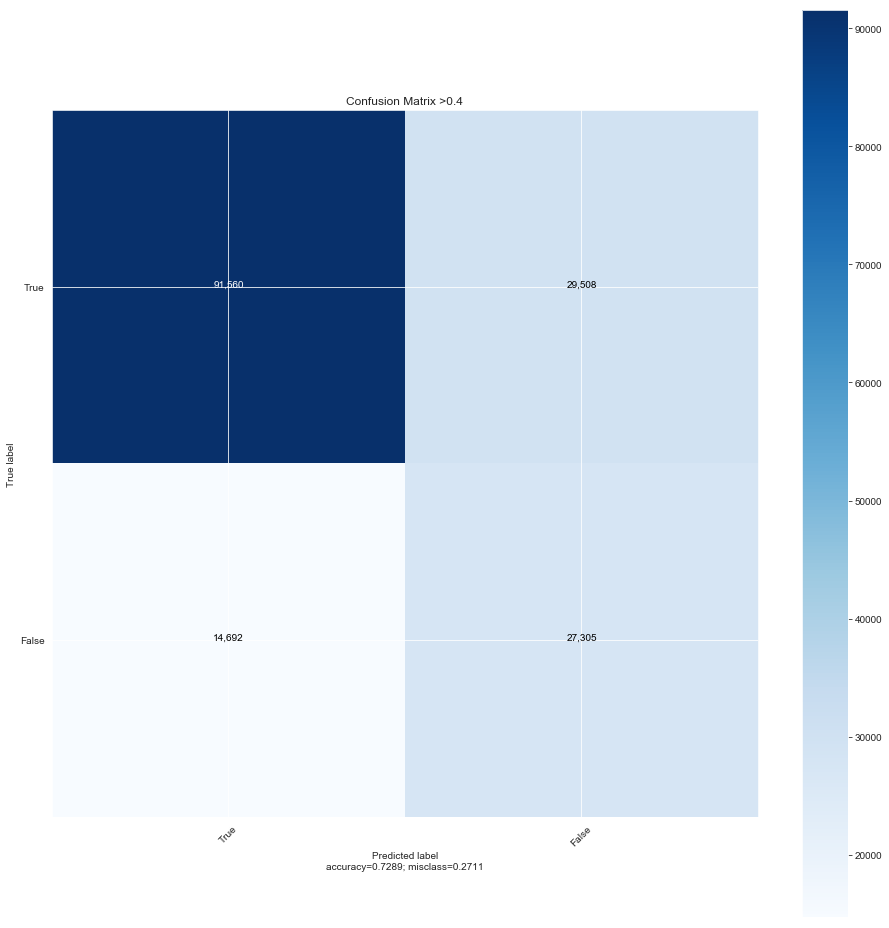

COMMUTING_TO_WORK_Public_transportation_(excluding_taxicab)    0.043052
dtype: float64
0.7757115324279503 0.7772085518354175


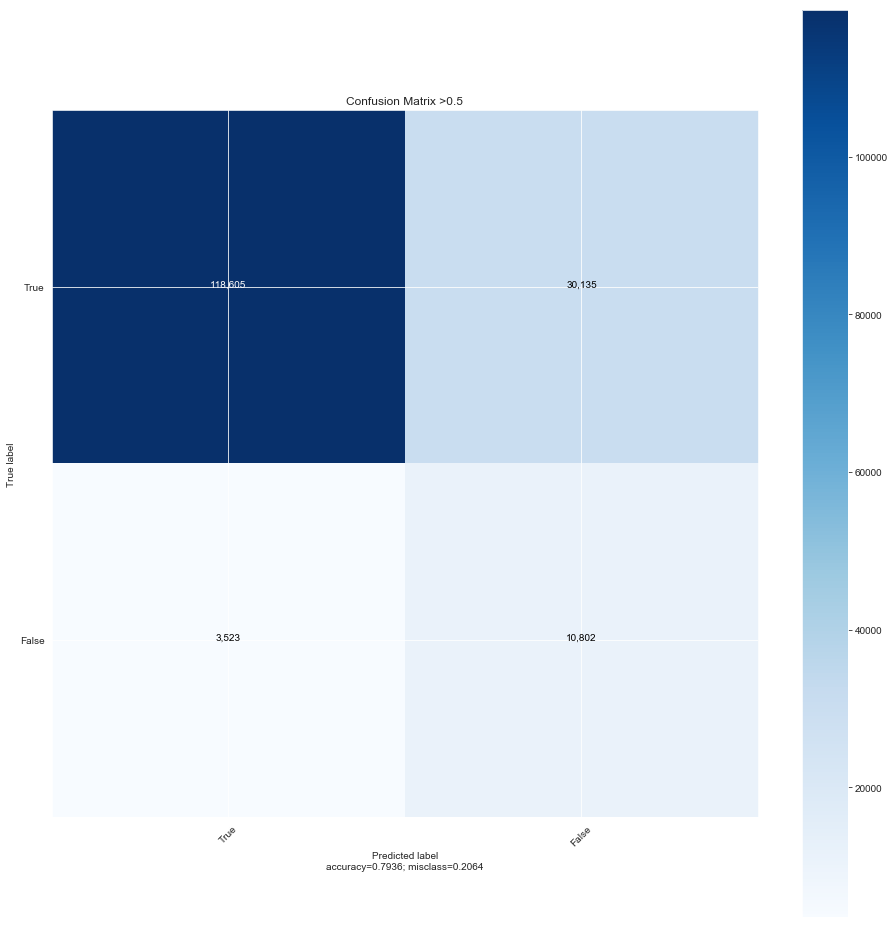

Percent_HISPANIC_OR_LATINO_AND_RACE_Not_Hispanic_or_Latino_Asian_alone    0.048286
dtype: float64
0.8342312596583377 0.8361706439681816


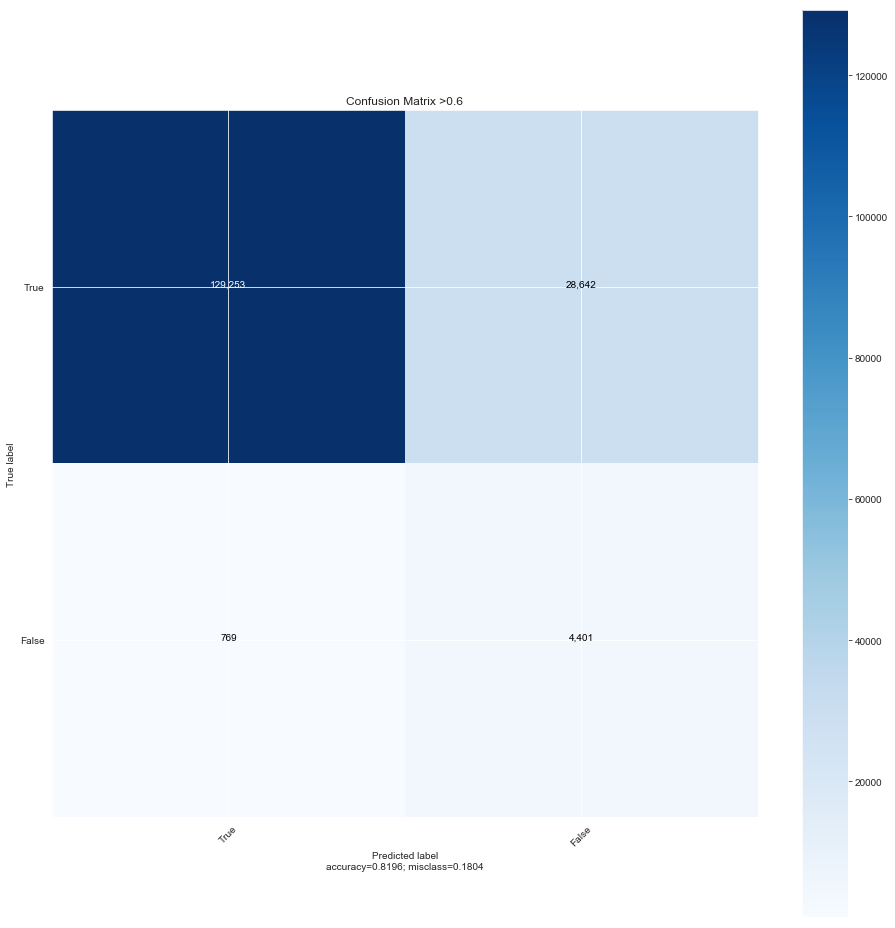

HISPANIC_OR_LATINO_AND_RACE_Not_Hispanic_or_Latino_Asian_alone    0.036888
dtype: float64
0.8747011375387798 0.8739452000397101


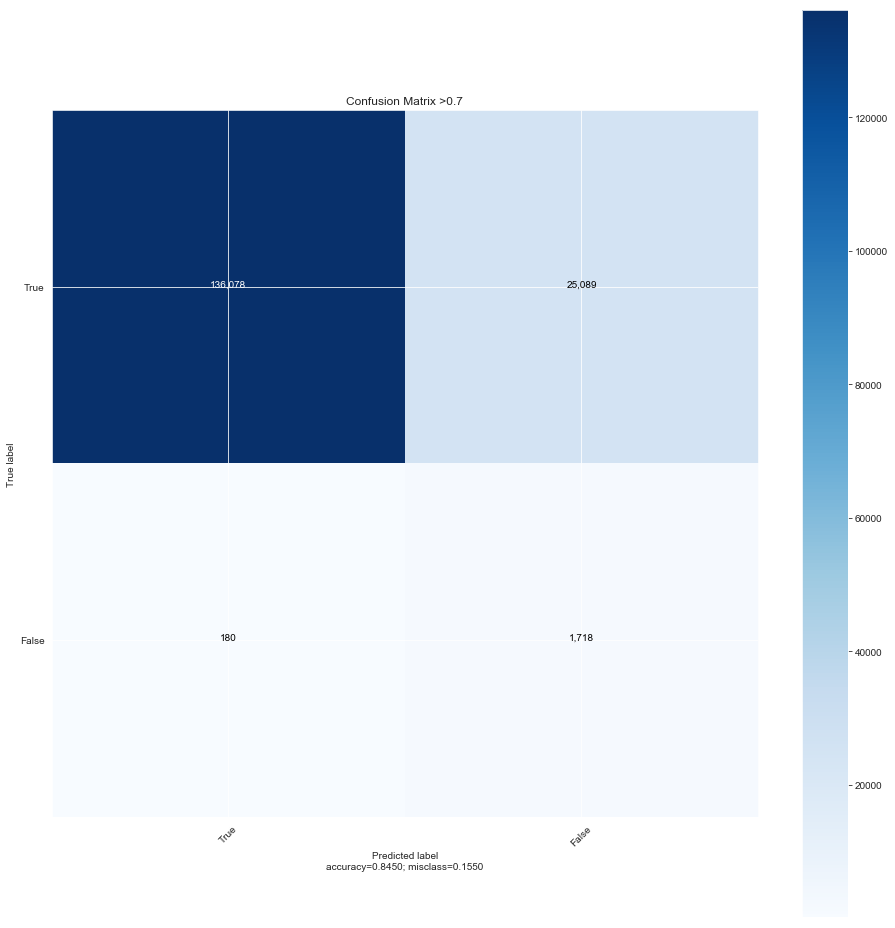

RACE_One_race_Asian_Filipino    0.037894
dtype: float64
0.8904409953190441 0.8864129095836413


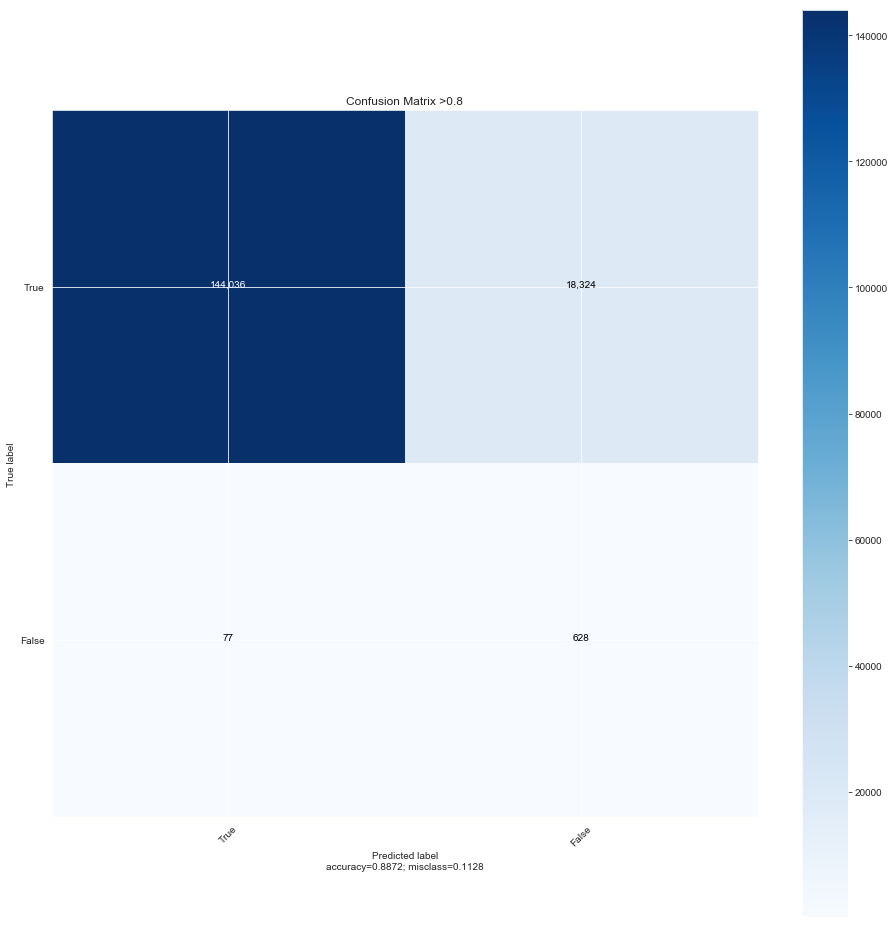

Percent_HISPANIC_OR_LATINO_AND_RACE_Hispanic_or_Latino_(of_any_race)_Other_Hispanic_or_Latino    0.032387
dtype: float64
0.8926070612515663 0.8908503476573058


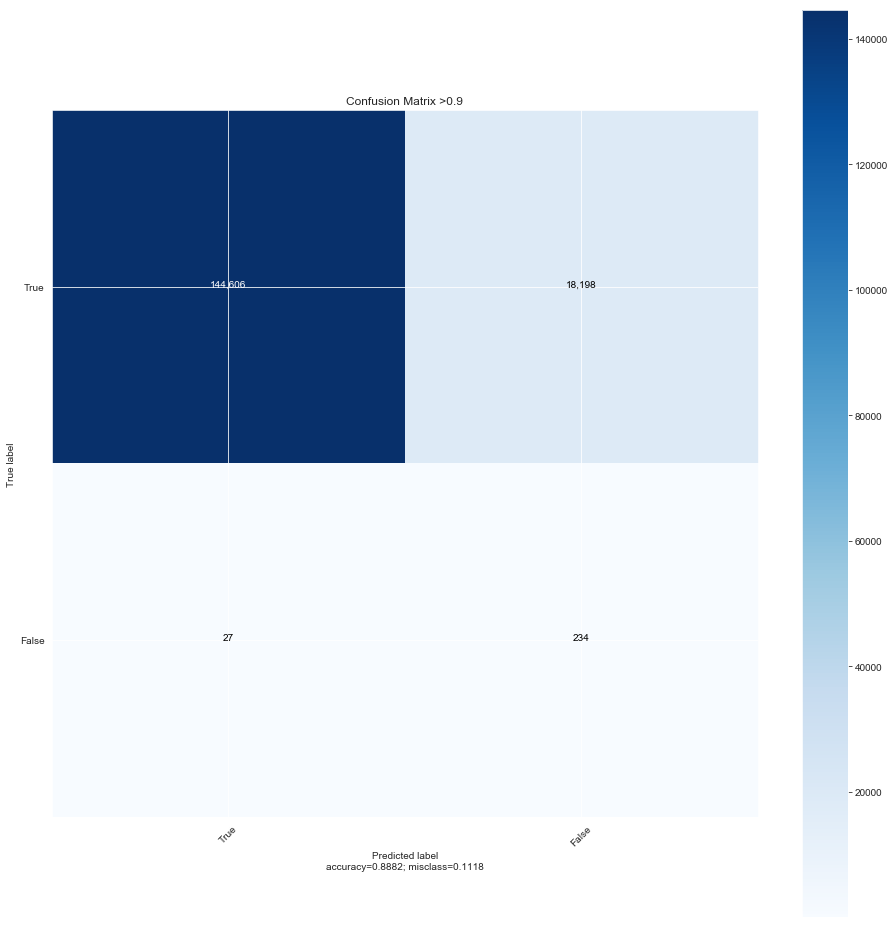

In [8]:

true_false= [True, False]
for i in bins[1:-1]:
    num_df[target] = df[target] > i
    values = num_df[target].value_counts().sort_values(ascending=False)
    low_class, add_sample = values.index[1], values.iloc[0]-values.iloc[-1] 
    balancing_indexes = np.random.choice(num_df[target].loc[num_df[target] == low_class].index, add_sample)
    data = num_df.append(num_df.loc[balancing_indexes], ignore_index=True)
    model_clean, feat = random_forest(data, show=1)
    X = num_df.drop(columns=[target])
    pred = model_clean.predict(X)
    cnf_matrix = confusion_matrix(num_df[target], pred)
    ax = plot_confusion_matrix(cnf_matrix, true_false, title=f"Confusion Matrix >{i}",normalize=False)
    plt.show()

In [9]:
    num_df[target] = df[target] > i
    values = num_df[target].value_counts().sort_values(ascending=False)
    low_class, add_sample = values.index[1], values.iloc[0]-values.iloc[-1] 
    balancing_indexes = np.random.choice(num_df[target].loc[num_df[target] == low_class].index, add_sample)
    data = num_df.append(num_df.loc[balancing_indexes], ignore_index=True)

In [10]:
data[target].value_counts()

True     162804
False    162804
Name: ratio_to_max_payment, dtype: int64

In [11]:
low_class

True

In [12]:
values

False    162804
True        261
Name: ratio_to_max_payment, dtype: int64